## 타이타닉 탑승객 생존여부 데이터


- 시각화

- 나이별 생존여부<br>
- 성별별 생존여부<br>
- 탑승요금과 생존여부<br>
- 나이와 성별별 생존여부<br>
- 티켓클래스별 생존여부

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Portfolio\hands on machine learning dataset\titanic.csv")

In [3]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.columns = ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'survived']

In [5]:
df = df[['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp','Parch','Pclass', 'Embarked','survived']]
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


### 데이터 설명

Survived - 생존 여부 (0 = 사망, 1 = 생존)<br>
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)<br>
Sex - 성별<br>
Age - 나이<br>
SibSp - 함께 탑승한 자녀 / 배우자 의 수<br>
Parch - 함께 탑승한 부모님 / 아이들 의 수<br>
Fare - 탑승 요금<br>

Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
Parch          1309 non-null int64
Pclass         1309 non-null int64
Embarked       1307 non-null float64
survived       1309 non-null int64
dtypes: float64(3), int64(6)
memory usage: 92.1 KB


In [7]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [8]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
survived       0
dtype: int64

### 나이별 생존여부

In [9]:
survived_age = df[df['survived'] == 1]['Age'].reset_index(drop = True)
died_age = df[df['survived'] == 0]['Age'].reset_index(drop = True)

In [10]:
df2 = pd.DataFrame([survived_age,died_age])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,957,958,959,960,961,962,963,964,965,966
Age,38.0,26.0,35.0,27.0,14.0,4.0,58.0,55.0,28.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,22.0,35.0,28.0,54.0,2.0,20.0,39.0,14.0,2.0,31.0,...,28.0,3.0,28.0,37.0,28.0,28.0,39.0,38.5,28.0,28.0


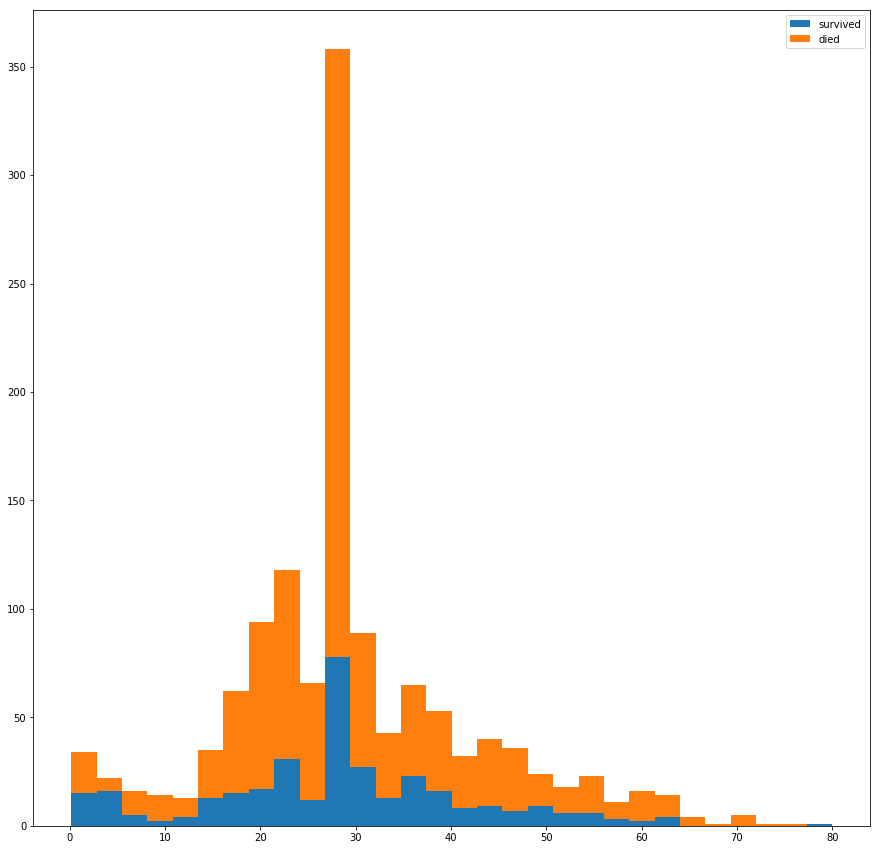

In [11]:
plt.figure(figsize = (15,15))
plt.hist(df2 ,stacked = True, bins = 30, label = ('survived', 'died'))
plt.legend()
plt.show()

### 성별과 생존여부

In [12]:
survived = df[df['survived'] == 1]['Sex'].value_counts() 
die = df[df['survived'] == 0]['Sex'].value_counts()

print(survived,'\n',die)

1    233
0    109
Name: Sex, dtype: int64 
 0    734
1    233
Name: Sex, dtype: int64


In [13]:
survived_sex = pd.DataFrame([survived,die])
survived_sex.index = ['survived', 'dead']
survived_sex.columns = ['male','female']
survived_sex.head()

,male,female
survived,109,233
dead,734,233


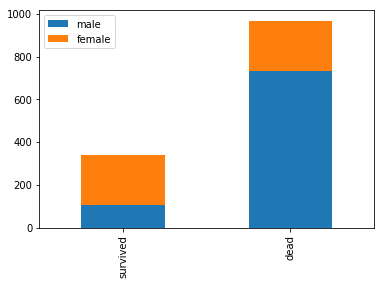

In [14]:
survived_sex.plot(kind = 'bar',stacked = True)

plt.show()

### 탑승요금과 생존여부

In [15]:
# 1등석 인원들의 평균 금액
pcl1_fare = df[df['Pclass']== 1]['Fare'].mean()
# 2등석 인원들의 평균 금액
pcl2_fare = df[df['Pclass'] == 2]['Fare'].mean()
# 3등석 인원들의 평균 금액
pcl3_fare = df[df['Pclass'] == 3]['Fare'].mean()

In [16]:
pcl_fare = pd.DataFrame([pcl1_fare,pcl2_fare,pcl3_fare])

In [17]:
pcl_fare.index = ['pcl1','pcl2','pcl3']
pcl_fare.columns = ['pcl_fare_mean']
pcl_fare.head()

,pcl_fare_mean
pcl1,87.508992
pcl2,21.179196
pcl3,13.304513


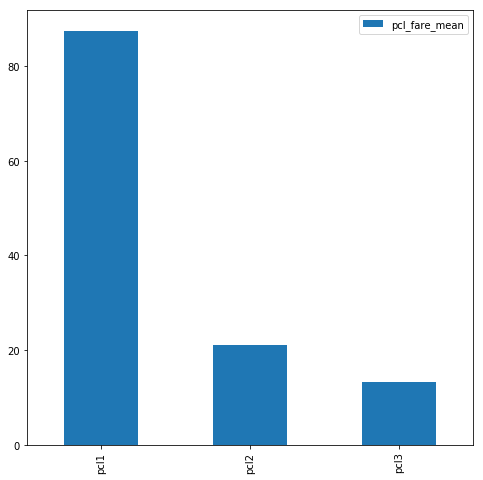

In [18]:
pcl_fare.plot(kind = 'bar', figsize = (8,8))
plt.show()

In [19]:
pcl1 = df[df['Pclass'] == 1]['survived'].value_counts()
pcl2 = df[df['Pclass'] == 2]['survived'].value_counts()
pcl3 = df[df['Pclass'] == 3]['survived'].value_counts()

In [20]:
survived_pcl = pd.DataFrame({"Pclass1" : pcl1 ,"Pclass2" : pcl2,"Pclass3" : pcl3})
survived_pcl.index = ['Die','Survive']
survived_pcl.head()

,Pclass1,Pclass2,Pclass3
Die,187,190,590
Survive,136,87,119


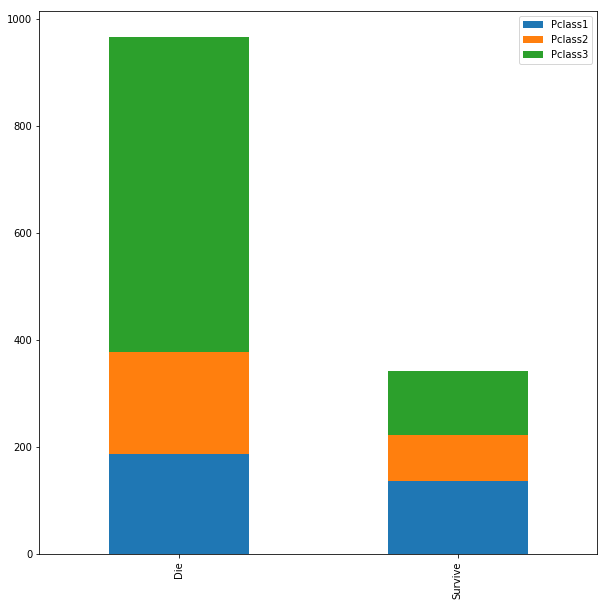

In [21]:
survived_pcl.plot(kind = 'bar', stacked = True , figsize = (10,10))
plt.legend(survived_pcl.columns)
plt.show()

In [22]:
df_corr = df.corr()

In [23]:
df_corr

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
Passengerid,1.000000,0.025799,0.031128,-0.013406,-0.055224,0.008942,-0.038354,-0.051518,-0.331493
Age,0.025799,1.000000,0.178182,-0.053663,-0.189972,-0.125851,-0.377908,-0.065125,-0.055862
Fare,0.031128,0.178182,1.000000,0.185681,0.160349,0.221635,-0.558683,-0.239212,0.173786
Sex,-0.013406,-0.053663,0.185681,1.000000,0.109609,0.213125,-0.124617,-0.099408,0.404020
sibsp,-0.055224,-0.189972,0.160349,0.109609,1.000000,0.373587,0.060832,0.066055,-0.014375
Parch,0.008942,-0.125851,0.221635,0.213125,0.373587,1.000000,0.018322,0.045216,0.054908
Pclass,-0.038354,-0.377908,-0.558683,-0.124617,0.060832,0.018322,1.000000,0.187349,-0.244686
Embarked,-0.051518,-0.065125,-0.239212,-0.099408,0.066055,0.045216,0.187349,1.000000,-0.093225
survived,-0.331493,-0.055862,0.173786,0.404020,-0.014375,0.054908,-0.244686,-0.093225,1.000000


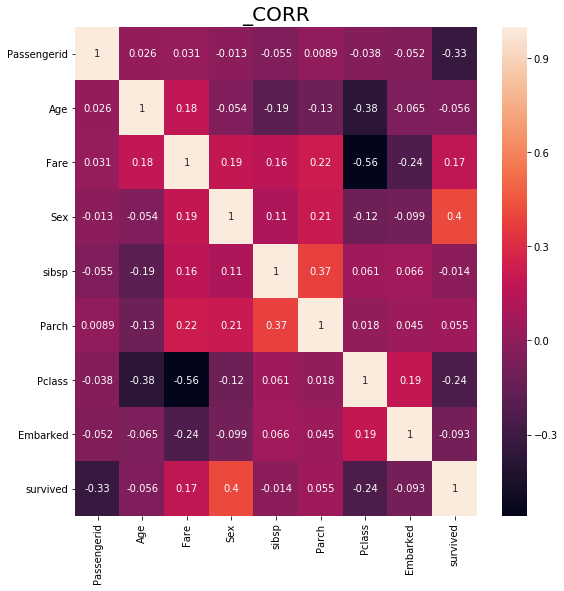

In [24]:
f, ax = plt.subplots(figsize = (9,9))
sns.heatmap(df_corr, annot = True)
plt.title('_CORR', fontsize = 20)
plt.show()

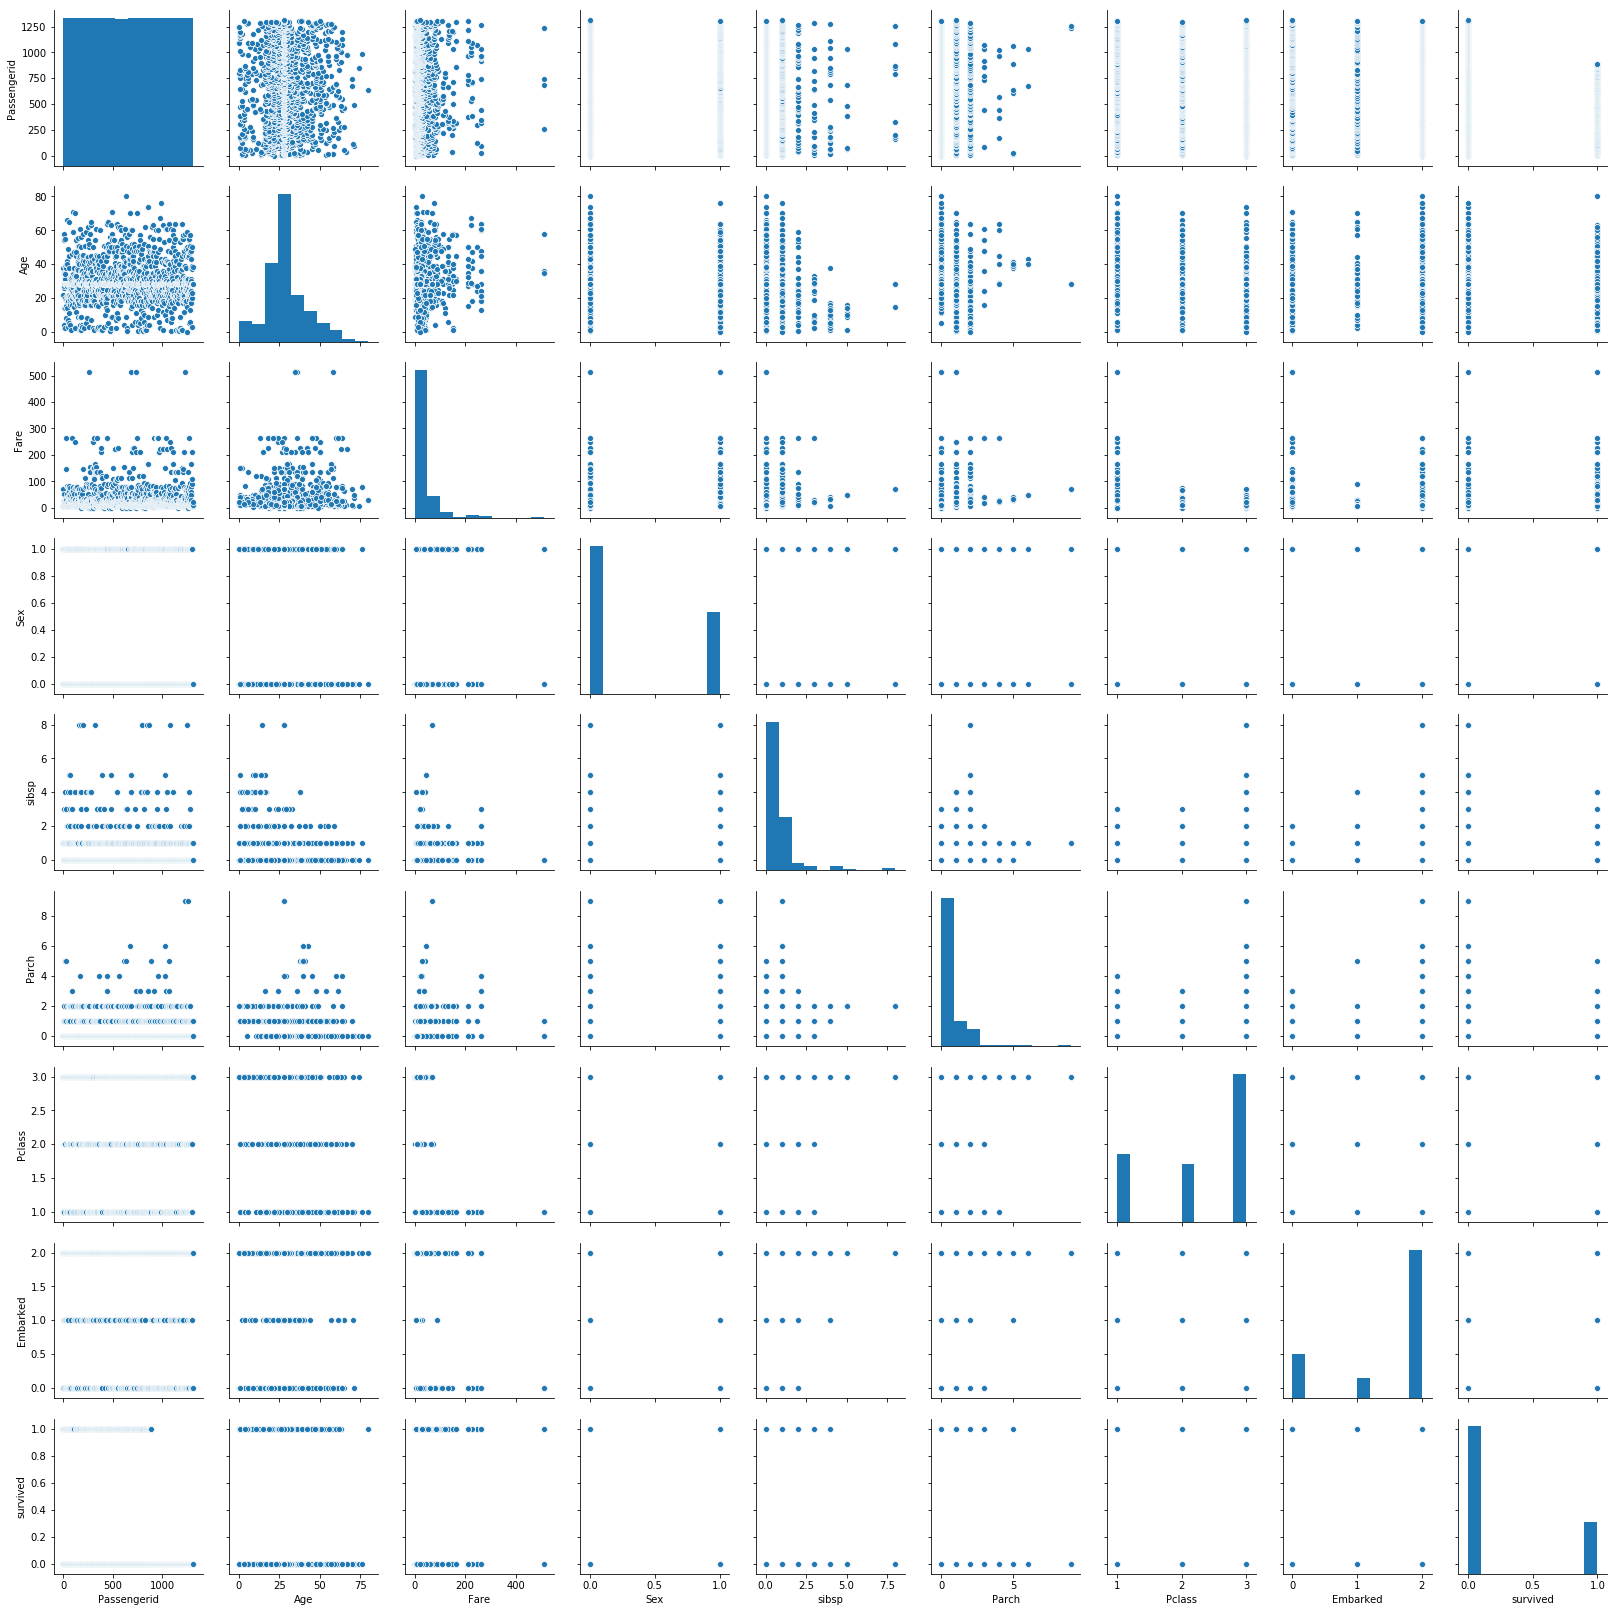

In [25]:
sns.pairplot(df)
plt.show()

### Logistic Regression

In [26]:
df = df.fillna(0)
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
survived       0
dtype: int64

In [27]:
train = df.iloc[:,1:-1]
train.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


In [28]:
target = df.iloc[:,-1:]
target.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,target)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(981, 7)
(328, 7)
(981, 1)
(328, 1)


In [31]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression()

In [32]:
logi_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred = logi_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import accuracy_score
print("logi_reg 모델의 accuracy_score : {}".format(accuracy_score(y_pred,y_test).round(4)))

logi_reg 모델의 accuracy_score : 0.7774


In [35]:
y_test = y_test.reset_index(drop = True)

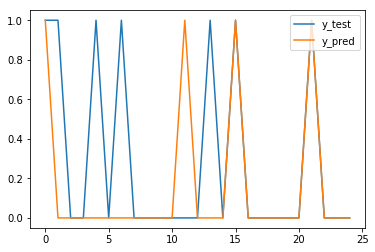

In [36]:
plt.plot(y_test[:25], label = 'y_test')
plt.plot(y_pred[:25], label = 'y_pred')
plt.legend(loc = 'upper right')
plt.show()

## confusion matrix

|P/N|**P**|**N**|
|---|---|---|
|**P**|True Positive(TP)|False Negative(FN)|
|**N**|False Positive(FP)|True Negative(TN)|


**True Positive(TP)** : 1인 레이블을 1이라 하는 경우<br>
**False Negative(FN)** : 1인 레이블이 0이라 하는 경우<br>
**False Positive(FP)** : 0인 레이블을 1이라 하는 경우<br>
**True Negative(TN)** : 0인 레이블을 0이라 하는 경우


#### 측정 지표

**정확도(Accuracy)** :1을 1로, 0을 0으로 정확하게 분류했는지, 모델이 얼마나 정확한지 평가하는 척도<br>
> $TP + TN \over TP + FN + FP + TN$

**정밀도(Precision)** : 1로 분류한 것중 진짜 1이 얼마나 있는지 평가하는 척도 <br> 
> $TP \over TP + FP$<BR>

**재현(Recall)** : 전체 1중에 1이 얼마나 있는지에 대한 척도 <br>
> $TP \over TP + FN$

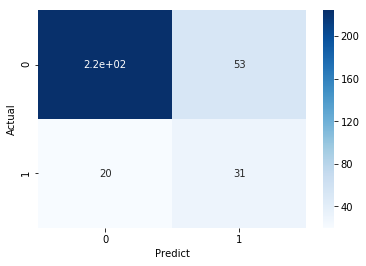

In [37]:
# confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
ax = confusion_matrix(y_pred, y_test)
sns.heatmap(ax, annot = True, cmap = 'Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [38]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(logi_reg,X_train,y_train, cv = 3)

In [39]:
confusion_matrix(y_train,predictions)

array([[662,  61],
       [153, 105]], dtype=int64)

In [40]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train,predictions)

0.6325301204819277

In [41]:
# recall_score
recall_score(y_train,predictions)

0.4069767441860465

In [42]:
# f1_score by logistic model
from sklearn.metrics import f1_score
f1_score(y_train,predictions)

0.4952830188679246

### K - Nearest Neighbor

- 최근접 이웃 분류기

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier(n_neighbors = 5)

In [44]:
KN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
KN_predict = KN.predict(X_test)

In [46]:
print("KN_model's accuracy_score : {}".format(accuracy_score(KN_predict, y_test).round(4)))

KN_model's accuracy_score : 0.7165


### Decision Tree

- 의사결정나무

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
tree = DecisionTreeClassifier()

In [49]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
tree_predict = tree.predict(X_test)

In [51]:
print("DecisionTree's accuracy_score : {}".format(accuracy_score(tree_predict, y_test).round(4)))

DecisionTree's accuracy_score : 0.753


### Support Vector Machine(SVM)



In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
svm_predict = svm.predict(X_test)

In [55]:
print("Support Vector Machine's accuracy_score : {}".format(accuracy_score(svm_predict, y_test).round(4)))

Support Vector Machine's accuracy_score : 0.7713


### MinMaxScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
min_max_scaler = MinMaxScaler()

In [58]:
train_min_max = min_max_scaler.fit_transform(train)

In [59]:
target_min_max = min_max_scaler.fit_transform(target)

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_min_max,target_min_max)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(981, 7)
(328, 7)
(981, 1)
(328, 1)


In [62]:
from sklearn.linear_model import LogisticRegression
logic_reg = LogisticRegression()

In [63]:
logic_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_pred = logic_reg.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
print("logic_reg 모델의 accuracy_score : {}".format(accuracy_score(y_pred,y_test).round(2)))

logic_reg 모델의 accuracy_score : 0.76


In [66]:
y_test = pd.DataFrame(y_test)

In [67]:
y_test = y_test.reset_index(drop = True)

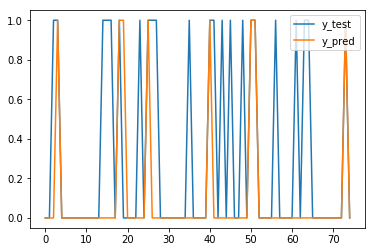

In [68]:
plt.plot(y_test[:75], label = 'y_test')
plt.plot(y_pred[:75], label = 'y_pred')
plt.legend(loc = 'upper right')
plt.show()

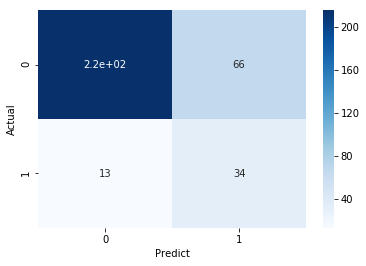

In [69]:
# confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
ax = confusion_matrix(y_pred, y_test)
sns.heatmap(ax, annot = True, cmap = 'Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [70]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(logi_reg,X_train,y_train, cv = 3)

In [71]:
confusion_matrix(y_train,predictions)

array([[685,  54],
       [159,  83]], dtype=int64)

In [72]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train,predictions)

0.6058394160583942

In [73]:
# recall_score
recall_score(y_train,predictions)

0.34297520661157027

In [74]:
# f1_score by logistic model
from sklearn.metrics import f1_score
f1_score(y_train,predictions)

0.43799472295514513